# Hiring - Process Mining
The data describes a multifaceted recruitment process with diverse application pathways ranging from minimal processing to extensive multi-step procedures. The variability of these routes, largely dependent on numerous determinants, yields a spectrum of outcomes from instant rejection to successful job offers.
The logs include attributes such as age, citizenship, German proficiency, gender, religion, and years of education. While these attributes may inform candidate profiles, their misuse could engender discrimination. Variables like age and education may signify experience and skills, citizenship and German language may address job logistics, but these should not unjustly eliminate applicants. Gender and religion, unrelated to job performance, must not sway hiring. Therefore, the use of these attributes must uphold fairness, avoiding any potential bias.

## Prequisites
We are going to use :
* pandas
* graphviz
* pm4py
to extract revelant data from these logs using Process Mining.

We first need to install our dependencies (librairies) and import our dataset and prepare it for Process Mining.

### Importing our librairies
We will import all librairies we are going to use in this application.

In [11]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_algorithm
from pm4py.algo.evaluation.precision import algorithm as precision_algorithm
from pm4py.algo.evaluation.generalization import algorithm as generalization_algorithm
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_algorithm
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

### Importing our dataset, cleaning it (if needed) and transforming it.
We must import our dataset.

In [12]:
# Step 1: Import the XES log file
log = xes_importer.apply("datasets/hiring_log_high.xes")

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

---

## Process Mining
### Explaining our workflow

For our Process Mining of the hiring dataset, we are going to split our workflow into three parts : 
1. Discover a process model using Inductive Miner
2. Visualize the process model
3. Quality measures

### Step 1 : Discover a process model using Inductive Miner
The first part is to create our model from the dataset using Inductive Miner in order to discover a model process.

In [13]:
# We are using one of pm4py's many available method in order to discover our process model.
# Discover a process tree using the Inductive Miner algorithm
tree = pm4py.discover_process_tree_inductive(log,
                                                     activity_key='concept:name',
                                                     timestamp_key='time:timestamp',
                                                     case_id_key='case:concept:name')
# Convert the ProcessTree to a Petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

/Users/clementcombier/ProjectsDatabases/venv/lib/python3.9/site-packages/pm4py/utils.py:537: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


### Step 2 : Visualize the process model
Now, we want to visualize our process model to see if our model is correct or not at a first glance.
Thanks to pm4py many methods, we will use them to make three visualization of our model.
1. A Petri Net
2. A Process Tree
3. A BPMN

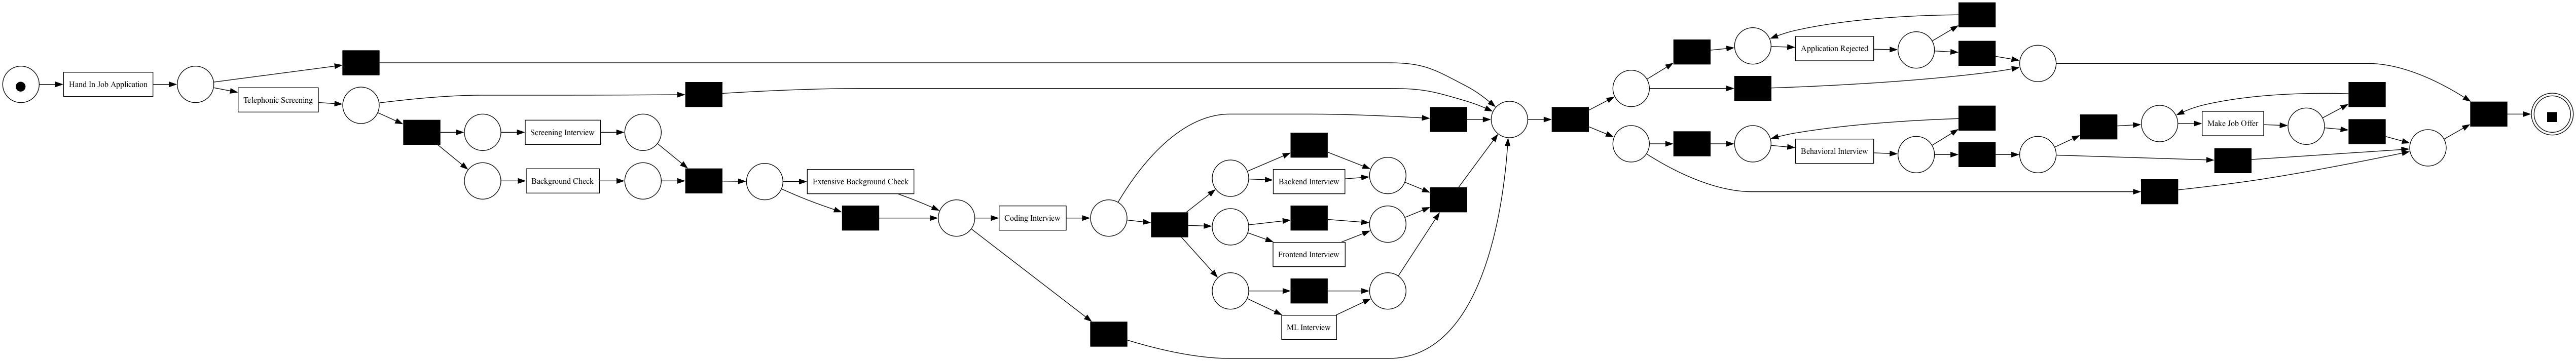

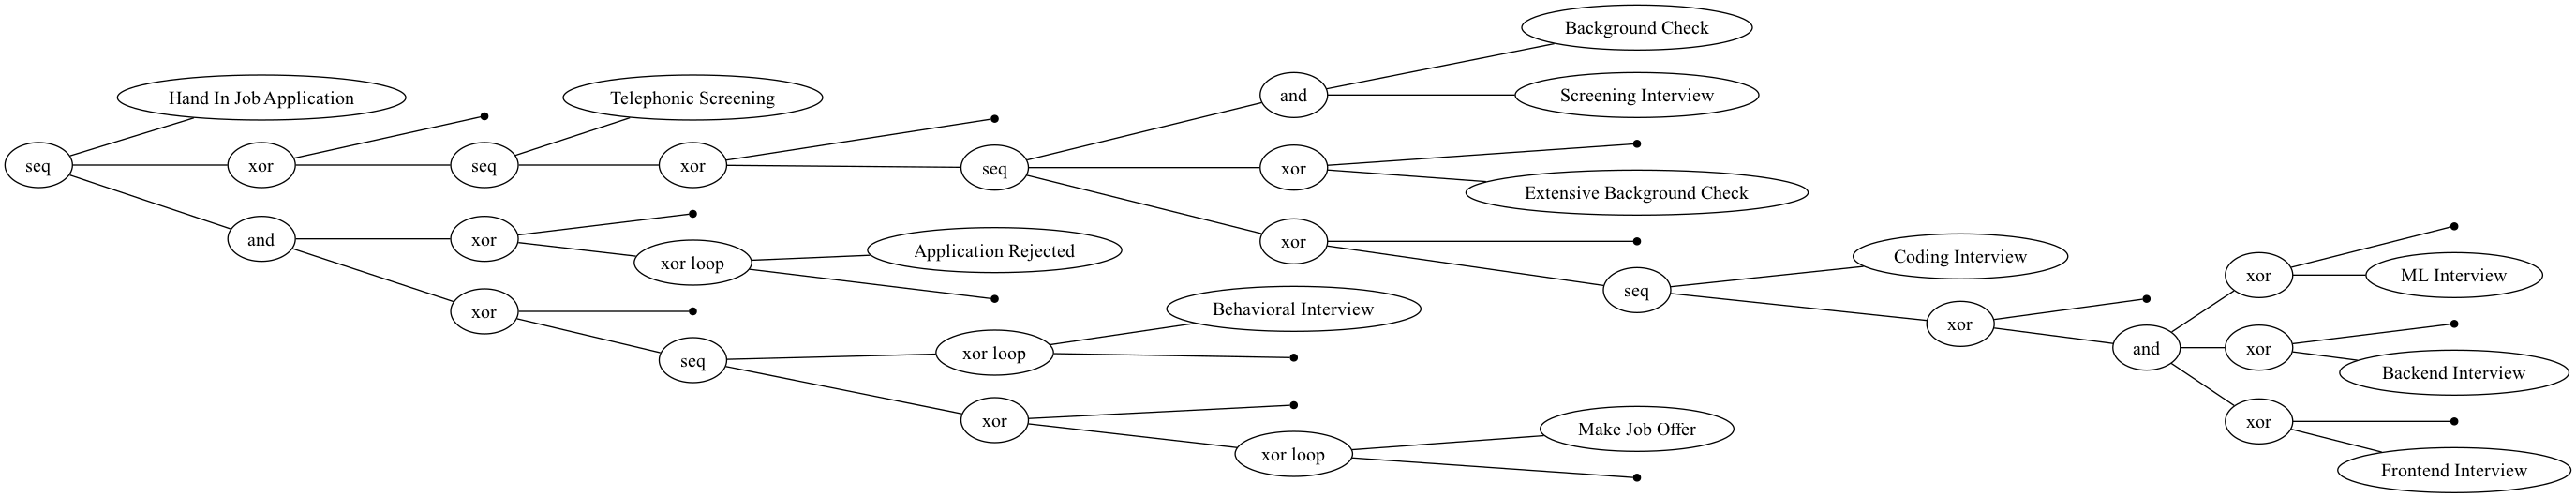

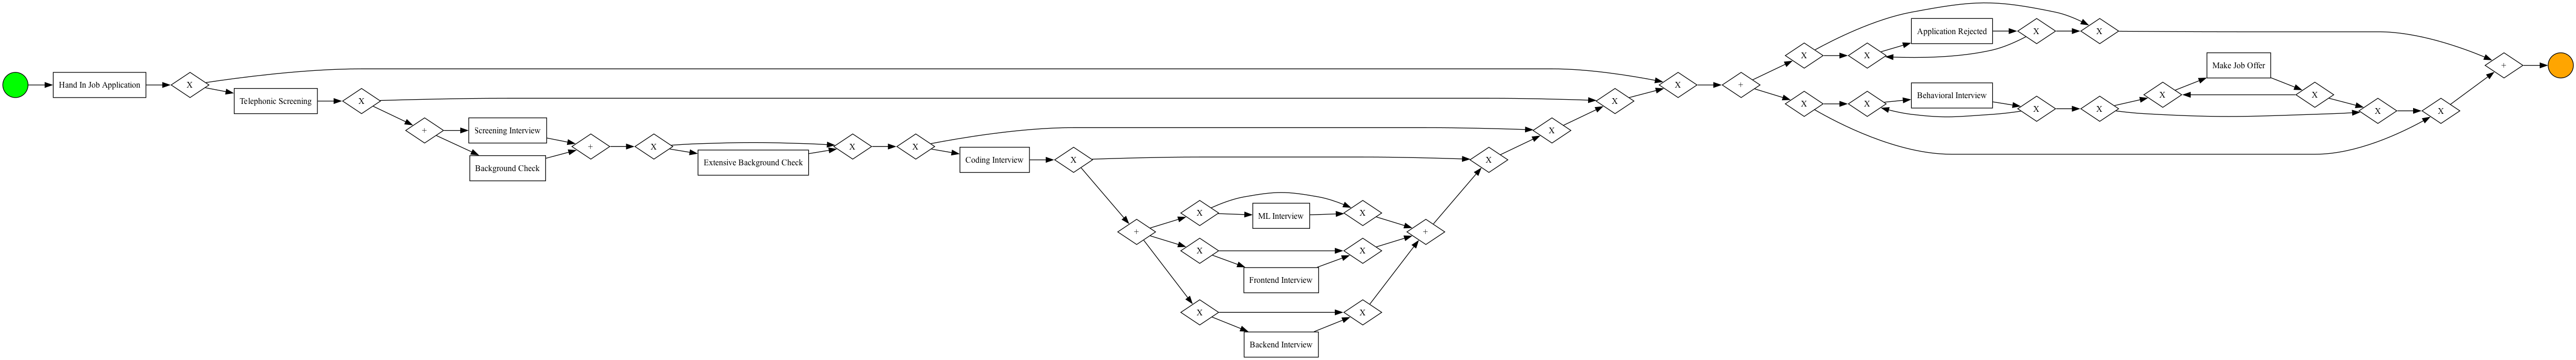

In [14]:
# Visualize as a Petri net
gviz_petri = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz_petri)

# Visualize as a process tree
gviz_tree = pt_visualizer.apply(tree)
pt_visualizer.view(gviz_tree)

# Convert to BPMN and visualize
bpmn_graph = pm4py.convert_to_bpmn(tree)
gviz_bpmn = bpmn_visualizer.apply(bpmn_graph)
bpmn_visualizer.view(gviz_bpmn)

### Step 3 : Quality measures
We do want to check if our model is fitting the log and is correct. For these, we are going to calculate :
1. Fitness
2. Precision
3. Generalization
4. Simplicity

In [15]:
# Replay Fitness Evaluation (using token-based replay)
fitness = replay_fitness_algorithm.apply(log, net, initial_marking, final_marking, variant=replay_fitness_algorithm.Variants.TOKEN_BASED)

# Precision Evaluation
precision = precision_algorithm.apply(log, net, initial_marking, final_marking)

# Generalization Evaluation
generalization = generalization_algorithm.apply(log, net, initial_marking, final_marking)

# Simplicity Evaluation
simplicity = simplicity_algorithm.apply(net)


# Print the quality measures
print(f"Fitness: {fitness}")
print(f"Precision: {precision}")
print(f"Generalization: {generalization}")
print(f"Simplicity: {simplicity}")

replaying log with TBR, completed variants ::   0%|          | 0/386 [00:00<?, ?it/s]

computing precision with alignments, completed variants ::   0%|          | 0/590 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/386 [00:00<?, ?it/s]

Fitness: {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Precision: 0.7923768769679558
Generalization: 0.9785354534241768
Simplicity: 0.6633663366336633


### Step 5 : Analysing our result
#### Analysing the Fitness of our model
* **Percentage of traces that fit the model** = 100%; It seems that every traces in our log can be exactly replicated by our modal.
* **Average fitness of each traces in the log** = 1; It seems our traces conform perfectly to our model.
* **Percentage of fitting traces** = 100%; Similar to the percentage of traces that fit the model. A result of 100% tells us traces fit our model!

#### Analysing the Precision of our model
* **Precision** = 0.79 ≃ 80%; A good result for the precision of our model. It is estimated that it's precise at 80% for our traces.

#### Analysing the Generalization of our moddel
* **Generalization** = 0.978 ≃ 98%; Another good result, it seems that in 98% of cases our model is able to handle cases that are similar but still different from what's it used to.

#### Analysing the Simplicity of our moddel
* **Simplicity** = 0.66 ≃ 66%; This result could be higher. Our model is moderatly simple. You may need some times or prior knowledge to correctly understand our model.